In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


# 1. ÌöåÏõêÏ†ïÎ≥¥ ÌååÏùº Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
member_file_paths = [
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201807_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201808_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201809_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201810_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201811_train_ÌöåÏõêÏ†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/1.ÌöåÏõêÏ†ïÎ≥¥/201812_train_ÌöåÏõêÏ†ïÎ≥¥.parquet"
]

# 2. Ïã†Ïö©Ï†ïÎ≥¥ ÌååÏùº Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
marketing_file_paths = [
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201807_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201808_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201809_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201810_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201811_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201812_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet"
]

# 3. Í∏∞Ï§ÄÎÖÑÏõî Ïª¨Îüº Ï∂îÍ∞Ä Î∞è Î≥ëÌï© Ìï®Ïàò
def load_and_merge_parquet(file_paths):
    df_list = []
    for path in file_paths:
        df = pd.read_parquet(path)
        Í∏∞Ï§ÄÎÖÑÏõî = os.path.basename(path).split('_')[0]
        df['Í∏∞Ï§ÄÎÖÑÏõî'] = Í∏∞Ï§ÄÎÖÑÏõî
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# 4. Îç∞Ïù¥ÌÑ∞ Î°úÎî©
member_df = load_and_merge_parquet(member_file_paths)
marketing_df = load_and_merge_parquet(marketing_file_paths)

# 5. Segment Ïª¨Îüº ÏûêÎèô ÌÉêÏÉâ Î∞è Ïà´ÏûêÌòï Î≥ÄÌôò
segment_col_candidates = [col for col in member_df.columns if 'segment' in col.lower()]
print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú segment Ïª¨Îüº ÌõÑÎ≥¥:", segment_col_candidates)
segment_col = segment_col_candidates[-1]

if member_df[segment_col].dtype == 'object':
    member_df[segment_col] = member_df[segment_col].astype('category').cat.codes

# 6. Îëê DataFrameÏùÑ 'ID'ÏôÄ 'Í∏∞Ï§ÄÎÖÑÏõî' Í∏∞Ï§ÄÏúºÎ°ú inner join (Î≥ëÌï© ÏïÑÎãò, ÎèôÍ∏∞Ìôî)
target_cols = ['ID', 'Í∏∞Ï§ÄÎÖÑÏõî', segment_col]
member_target = member_df[target_cols]
combined_df = pd.merge(member_target, marketing_df, on=['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'], how='inner')

# 7. Î∂ÑÏÑù ÎåÄÏÉÅ numeric Ïª¨ÎüºÎßå ÏÑ†ÌÉù
numeric_cols = [col for col in combined_df.select_dtypes(include=['int64', 'float64']).columns if col != segment_col]

# 8. Í≤∞Ï∏°Ïπò Ï†úÍ±∞ Î∞è std=0 Ïª¨Îüº Ï†úÍ±∞
clean_df = combined_df[numeric_cols + [segment_col]].dropna()
clean_df = clean_df.loc[:, clean_df.std() != 0]
numeric_cols = [col for col in numeric_cols if col in clean_df.columns]

# 9. Í≤∞Ï∏°Ïπò Ïàò Í≥ÑÏÇ∞
missing_dict = {
    col: combined_df[col].isnull().sum()
    for col in numeric_cols
}

# 10. Ïù¥ÏÉÅÏπò Ïàò Í≥ÑÏÇ∞ (IQR Í∏∞Ï§Ä)
outlier_dict = {}
for col in numeric_cols:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((combined_df[col] < lower_bound) | (combined_df[col] > upper_bound)).sum()
    outlier_dict[col] = outliers

# 11. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_dict = {
    col: clean_df[segment_col].corr(clean_df[col])
    for col in numeric_cols
}

# 12. Í≤∞Í≥º Ï†ïÎ¶¨
corr_df = pd.DataFrame({
    'Ïª¨ÎüºÎ™Ö': list(corr_dict.keys()),
    'ÏÉÅÍ¥ÄÍ≥ÑÏàò': list(corr_dict.values()),
    'Í≤∞Ï∏°Ïπò Ïàò': [missing_dict[col] for col in corr_dict.keys()],
    'Ïù¥ÏÉÅÏπò Ïàò': [outlier_dict[col] for col in corr_dict.keys()]
})

corr_df = corr_df.sort_values(by='ÏÉÅÍ¥ÄÍ≥ÑÏàò', key=abs, ascending=False)

# 13. Ïä§ÌÉÄÏùºÎßÅ Ï∂úÎ†•
from IPython.display import display
styled = corr_df.style.background_gradient(cmap='coolwarm', subset=['ÏÉÅÍ¥ÄÍ≥ÑÏàò']) \
                    .set_properties(**{'text-align': 'center'}) \
                    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
display(styled)


ÏÇ¨Ïö© Í∞ÄÎä•Ìïú segment Ïª¨Îüº ÌõÑÎ≥¥: ['Segment']


In [ ]:
# [1] 0.3 Ïù¥Ìïò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅ
corr_under_02 = corr_df[abs(corr_df['ÏÉÅÍ¥ÄÍ≥ÑÏàò']) <= 0.3]

# [2] Î≥ÄÏàò Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
low_corr_vars = corr_under_02['Ïª¨ÎüºÎ™Ö'].unique().tolist()

# [3] clean_dfÏóêÏÑú Ï∂îÏ∂ú
eda_df = clean_df[low_corr_vars + ['Segment']]

# [4] Ï†ÄÏû•
eda_df.to_csv("Ïã†Ïö©Ï†ïÎ≥¥2_low_corr_segment_data.csv", index=False, encoding='utf-8-sig')
print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å: low_corr_segment_data.csv")


In [29]:
eda_df = clean_df[low_corr_vars + [segment_col]]



In [30]:
display(eda_df.groupby(segment_col).mean().style
        .background_gradient(cmap='YlGnBu')
        .set_caption("SegmentÎ≥Ñ ÌèâÍ∑† (ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.3 Ïù¥Ìïò Î≥ÄÏàòÎßå)"))



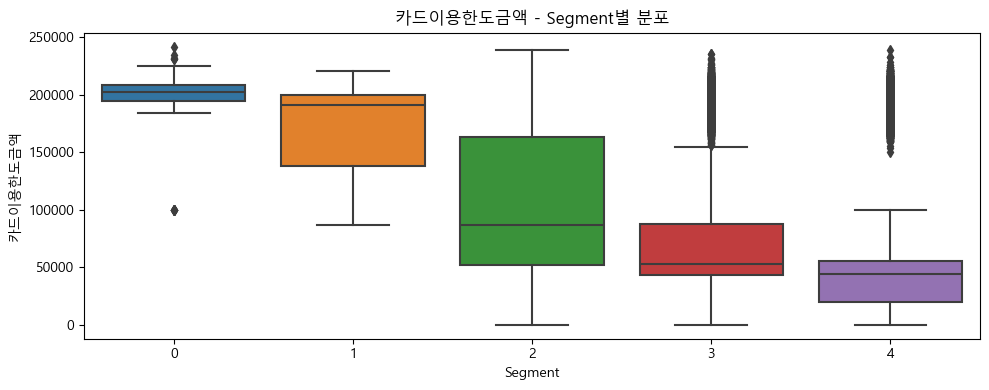

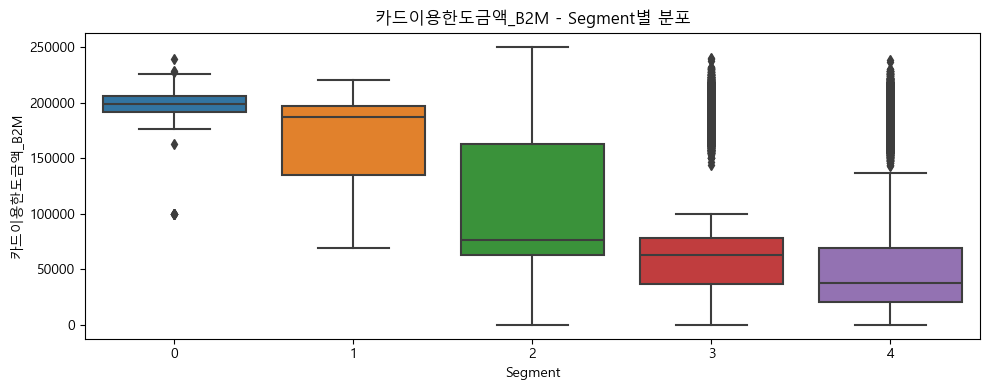

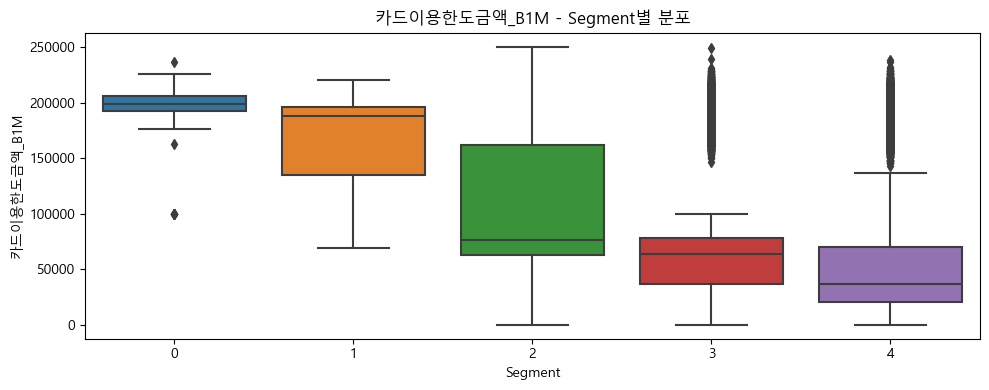

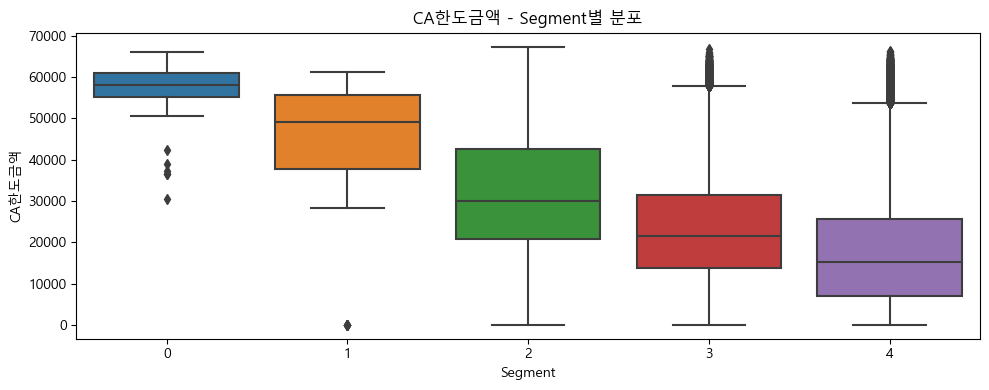

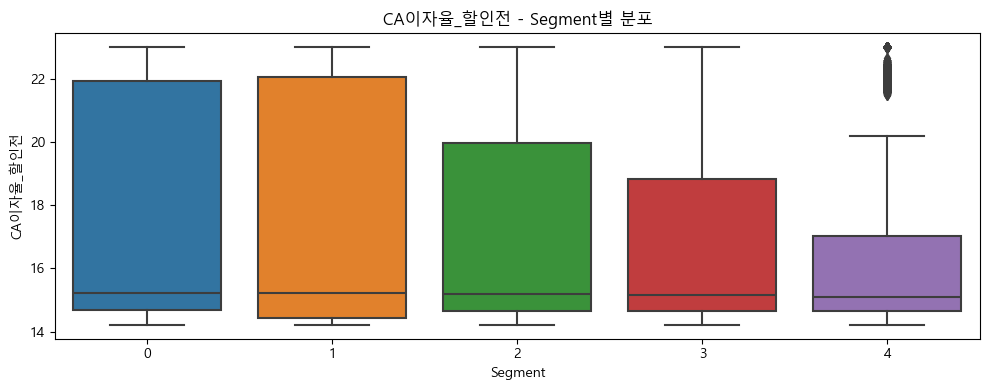

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in low_corr_vars[:5]:  # Ï†ÑÏ≤¥ ÎßêÍ≥† ÏòàÏãúÎ°ú 5Í∞ú
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=segment_col, y=col, data=eda_df)
    plt.title(f"{col} - SegmentÎ≥Ñ Î∂ÑÌè¨")
    plt.tight_layout()
    plt.show()


C:\Users\HR\AppData\Local\Temp\ipykernel_24964\2394508156.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=eda_df, x=segment_col, y=col, estimator='mean', ci='sd')


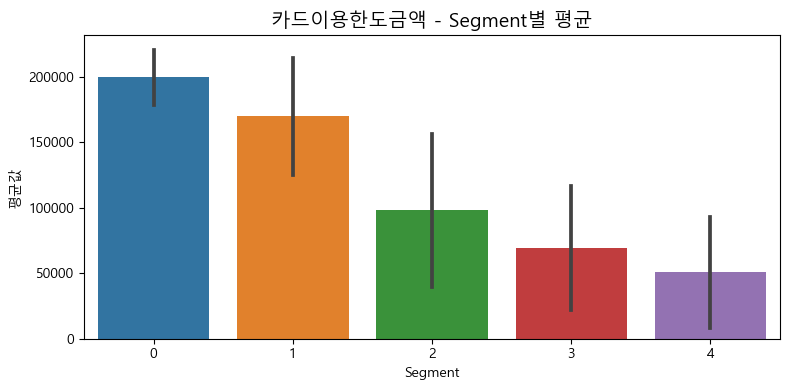

C:\Users\HR\AppData\Local\Temp\ipykernel_24964\2394508156.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=eda_df, x=segment_col, y=col, estimator='mean', ci='sd')


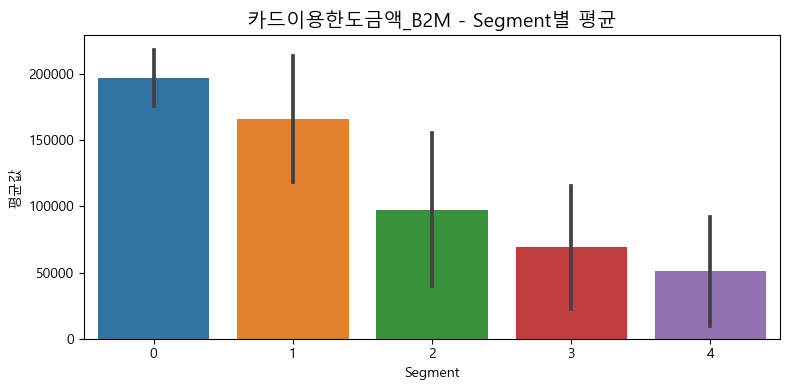

C:\Users\HR\AppData\Local\Temp\ipykernel_24964\2394508156.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=eda_df, x=segment_col, y=col, estimator='mean', ci='sd')


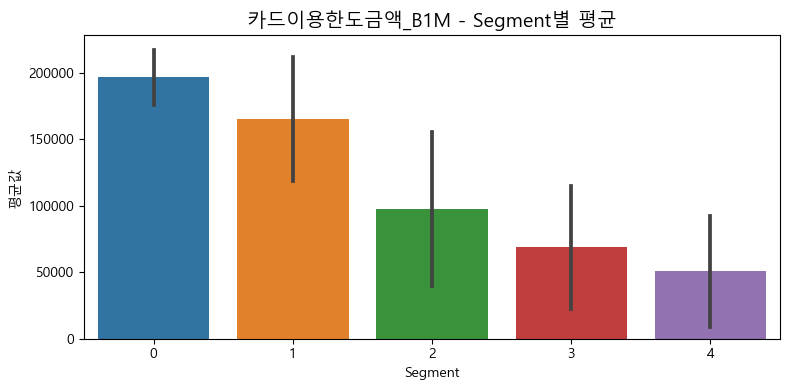

C:\Users\HR\AppData\Local\Temp\ipykernel_24964\2394508156.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=eda_df, x=segment_col, y=col, estimator='mean', ci='sd')


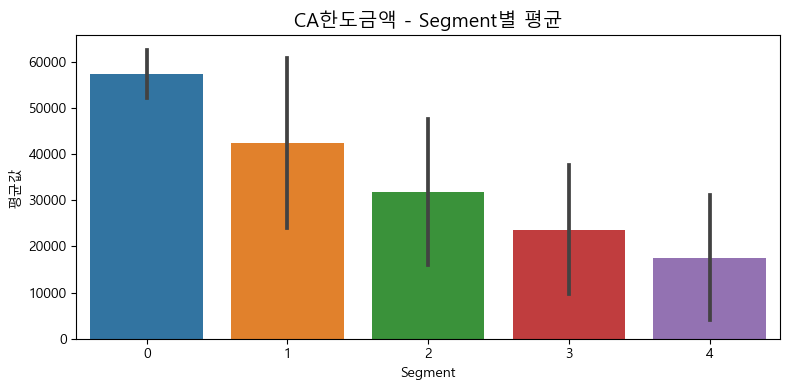

C:\Users\HR\AppData\Local\Temp\ipykernel_24964\2394508156.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=eda_df, x=segment_col, y=col, estimator='mean', ci='sd')


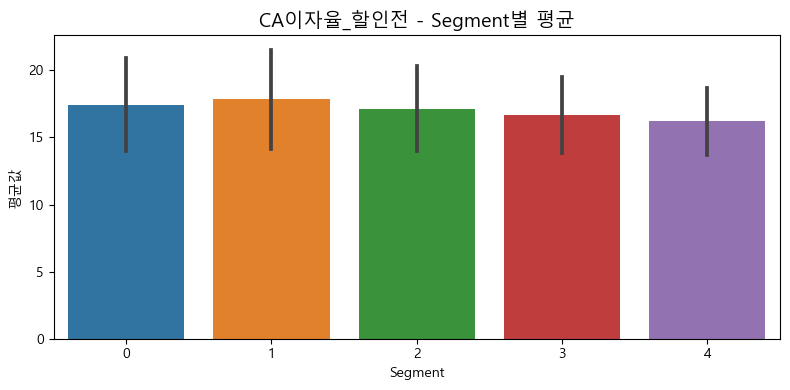

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ÏòàÏãú: Î≥ÄÏàò 5Í∞úÎßå ÏãúÍ∞ÅÌôî (ÌïÑÏöîÏãú Í∞úÏàò Ï°∞Ï†ï)
for col in low_corr_vars[:5]:  # ÎòêÎäî [:10], [:20]
    plt.figure(figsize=(8, 4))
    sns.barplot(data=eda_df, x=segment_col, y=col, estimator='mean', ci='sd')
    plt.title(f"{col} - SegmentÎ≥Ñ ÌèâÍ∑†", fontsize=14)
    plt.xlabel("Segment")
    plt.ylabel("ÌèâÍ∑†Í∞í")
    plt.tight_layout()
    plt.show()


C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

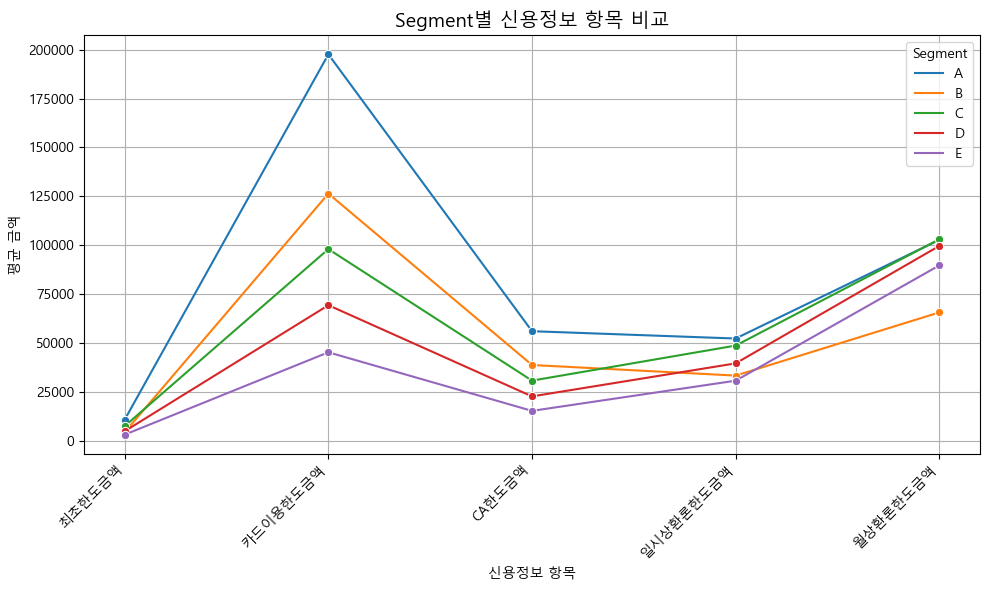

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import os

# 1. Ïã†Ïö©Ï†ïÎ≥¥ ÌååÏùº Î≥ëÌï©
marketing_file_paths = [
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201807_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201808_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201809_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201810_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201811_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201812_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet"
]

def load_and_merge_parquet(file_paths):
    df_list = []
    for path in file_paths:
        df = pd.read_parquet(path)
        Í∏∞Ï§ÄÎÖÑÏõî = os.path.basename(path).split('_')[0]
        df['Í∏∞Ï§ÄÎÖÑÏõî'] = Í∏∞Ï§ÄÎÖÑÏõî
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

credit_df = load_and_merge_parquet(marketing_file_paths)

# 2. ÌöåÏõêÏ†ïÎ≥¥ÏóêÏÑú ID, SegmentÎßå Î∂àÎü¨Ïò§Í∏∞
member_df = pd.read_csv("C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/ÌöåÏõêÏ†ïÎ≥¥_201807_201812_ÌÜµÌï©.csv")
member_df = member_df[['ID', 'Segment']]

# 3. Î≥ëÌï©
df = pd.merge(credit_df, member_df, on='ID', how='left')

# 4. ÏÇ¨Ïö©Ìï† Ïª¨Îüº
cols = [
    'ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°',
    'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°',
    'CAÌïúÎèÑÍ∏àÏï°',
    'ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°',
    'ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°'
]

# 5. SegmentÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
segment_avg = df.groupby('Segment')[cols].mean(numeric_only=True).reset_index()

# 6. longÌòï Î≥ÄÌôò
plot_df = segment_avg.melt(id_vars='Segment', var_name='Ìï≠Î™©', value_name='ÌèâÍ∑†Í∞í')

# 7. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# üî• Î∂àÌïÑÏöîÌïú map Ï†úÍ±∞
# plot_df['Segment'] = plot_df['Segment'].map(...)

# 8. ÎùºÏù∏ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_df, x='Ìï≠Î™©', y='ÌèâÍ∑†Í∞í', hue='Segment', marker='o')

plt.title("SegmentÎ≥Ñ Ïã†Ïö©Ï†ïÎ≥¥ Ìï≠Î™© ÎπÑÍµê", fontsize=14)
plt.xlabel("Ïã†Ïö©Ï†ïÎ≥¥ Ìï≠Î™©")
plt.ylabel("ÌèâÍ∑† Í∏àÏï°")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Segment")
plt.show()



C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

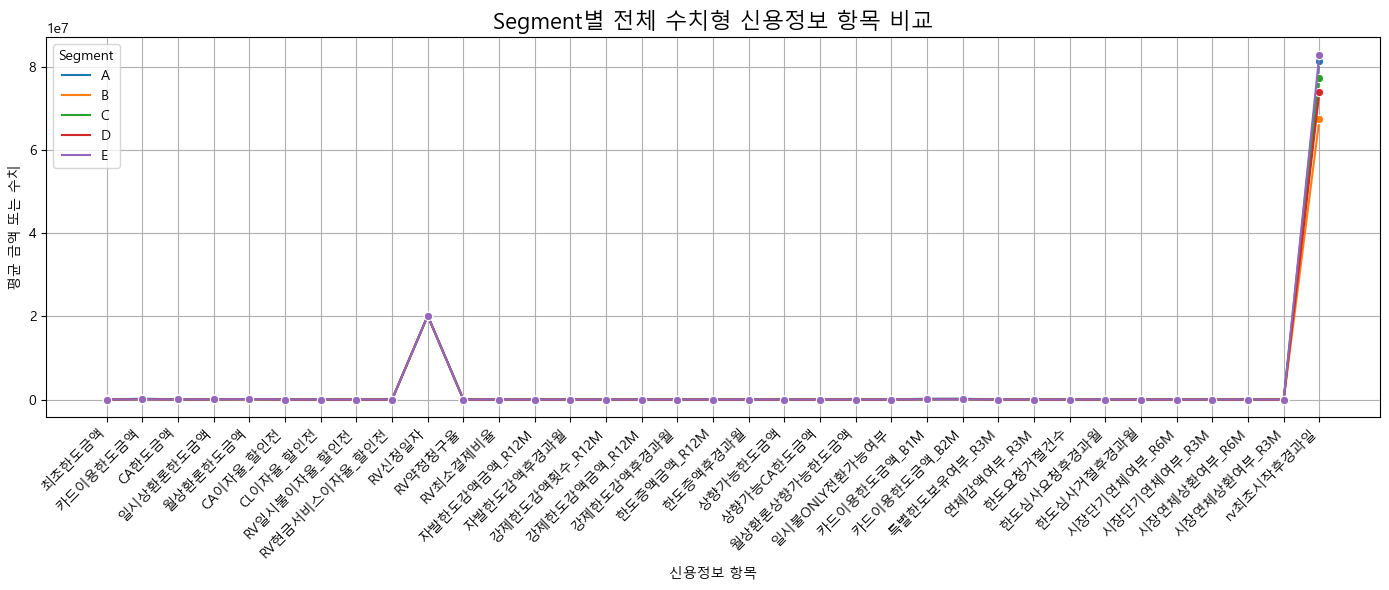

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import os

# 1. Ïã†Ïö©Ï†ïÎ≥¥ ÌååÏùº Î≥ëÌï©
marketing_file_paths = [
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201807_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201808_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201809_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201810_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201811_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201812_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet"
]

def load_and_merge_parquet(file_paths):
    df_list = []
    for path in file_paths:
        df = pd.read_parquet(path)
        Í∏∞Ï§ÄÎÖÑÏõî = os.path.basename(path).split('_')[0]
        df['Í∏∞Ï§ÄÎÖÑÏõî'] = Í∏∞Ï§ÄÎÖÑÏõî
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

credit_df = load_and_merge_parquet(marketing_file_paths)

# 2. ÌöåÏõêÏ†ïÎ≥¥ÏóêÏÑú ID, SegmentÎßå Î∂àÎü¨Ïò§Í∏∞
member_df = pd.read_csv("C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/ÌöåÏõêÏ†ïÎ≥¥_201807_201812_ÌÜµÌï©.csv")
member_df = member_df[['ID', 'Segment']]

# 3. Î≥ëÌï©
df = pd.merge(credit_df, member_df, on='ID', how='left')

# 4. SegmentÎ≥Ñ Ï†ÑÏ≤¥ ÏàòÏπòÌòï Ïª¨Îüº ÌèâÍ∑† Í≥ÑÏÇ∞
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Segment']  # Segment Ï†úÏô∏

segment_avg = df.groupby('Segment')[numeric_cols].mean(numeric_only=True).reset_index()

# 5. longÌòï Î≥ÄÌôò
plot_df = segment_avg.melt(id_vars='Segment', var_name='Ìï≠Î™©', value_name='ÌèâÍ∑†Í∞í')

# 6. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 7. ÎùºÏù∏ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x='Ìï≠Î™©', y='ÌèâÍ∑†Í∞í', hue='Segment', marker='o')

plt.title("SegmentÎ≥Ñ Ï†ÑÏ≤¥ ÏàòÏπòÌòï Ïã†Ïö©Ï†ïÎ≥¥ Ìï≠Î™© ÎπÑÍµê", fontsize=16)
plt.xlabel("Ïã†Ïö©Ï†ïÎ≥¥ Ìï≠Î™©")
plt.ylabel("ÌèâÍ∑† Í∏àÏï° ÎòêÎäî ÏàòÏπò")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Segment")
plt.show()


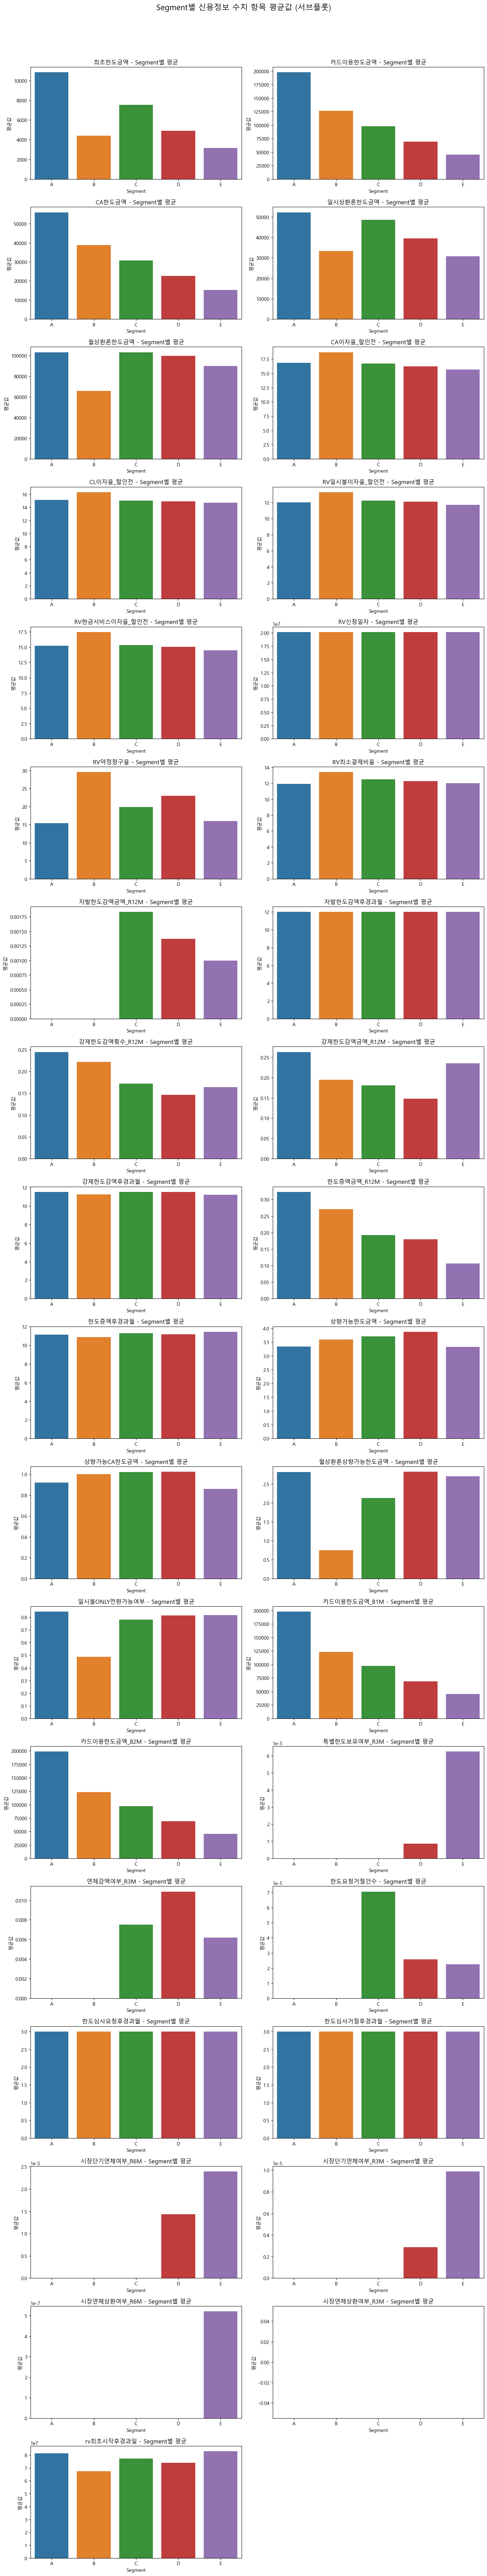

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import os
import math

# 1. Ïã†Ïö©Ï†ïÎ≥¥ ÌååÏùº Î≥ëÌï©
marketing_file_paths = [
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201807_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201808_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201809_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201810_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201811_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201812_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet"
]

def load_and_merge_parquet(file_paths):
    df_list = []
    for path in file_paths:
        df = pd.read_parquet(path)
        Í∏∞Ï§ÄÎÖÑÏõî = os.path.basename(path).split('_')[0]
        df['Í∏∞Ï§ÄÎÖÑÏõî'] = Í∏∞Ï§ÄÎÖÑÏõî
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

credit_df = load_and_merge_parquet(marketing_file_paths)

# 2. ÌöåÏõêÏ†ïÎ≥¥ÏóêÏÑú ID, SegmentÎßå Î∂àÎü¨Ïò§Í∏∞
member_df = pd.read_csv("C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/ÌöåÏõêÏ†ïÎ≥¥_201807_201812_ÌÜµÌï©.csv")
member_df = member_df[['ID', 'Segment']]

# 3. Î≥ëÌï©
df = pd.merge(credit_df, member_df, on='ID', how='left')

# 4. SegmentÎ≥Ñ Ï†ÑÏ≤¥ ÏàòÏπòÌòï Ïª¨Îüº ÌèâÍ∑† Í≥ÑÏÇ∞
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Segment']

segment_avg = df.groupby('Segment')[numeric_cols].mean(numeric_only=True).reset_index()

# 5. longÌòï Î≥ÄÌôò
plot_df = segment_avg.melt(id_vars='Segment', var_name='Ìï≠Î™©', value_name='ÌèâÍ∑†Í∞í')

# 6. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 7. ÏÑúÎ∏åÌîåÎ°ØÏúºÎ°ú ÎÇòÎàÑÏñ¥ ÏãúÍ∞ÅÌôî
unique_cols = plot_df['Ìï≠Î™©'].unique()
n_cols = 2  # Ïó¥ Í∞úÏàò
n_rows = math.ceil(len(unique_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(unique_cols):
    ax = axes[i]
    temp = plot_df[plot_df['Ìï≠Î™©'] == col]
    sns.barplot(data=temp, x='Segment', y='ÌèâÍ∑†Í∞í', ax=ax)
    ax.set_title(f"{col} - SegmentÎ≥Ñ ÌèâÍ∑†", fontsize=12)
    ax.set_xlabel("Segment")
    ax.set_ylabel("ÌèâÍ∑†Í∞í")

# Ïïà Ïì∞Îäî subplot Ï†úÍ±∞
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("SegmentÎ≥Ñ Ïã†Ïö©Ï†ïÎ≥¥ ÏàòÏπò Ìï≠Î™© ÌèâÍ∑†Í∞í (ÏÑúÎ∏åÌîåÎ°Ø)", fontsize=16, y=1.02)
plt.show()


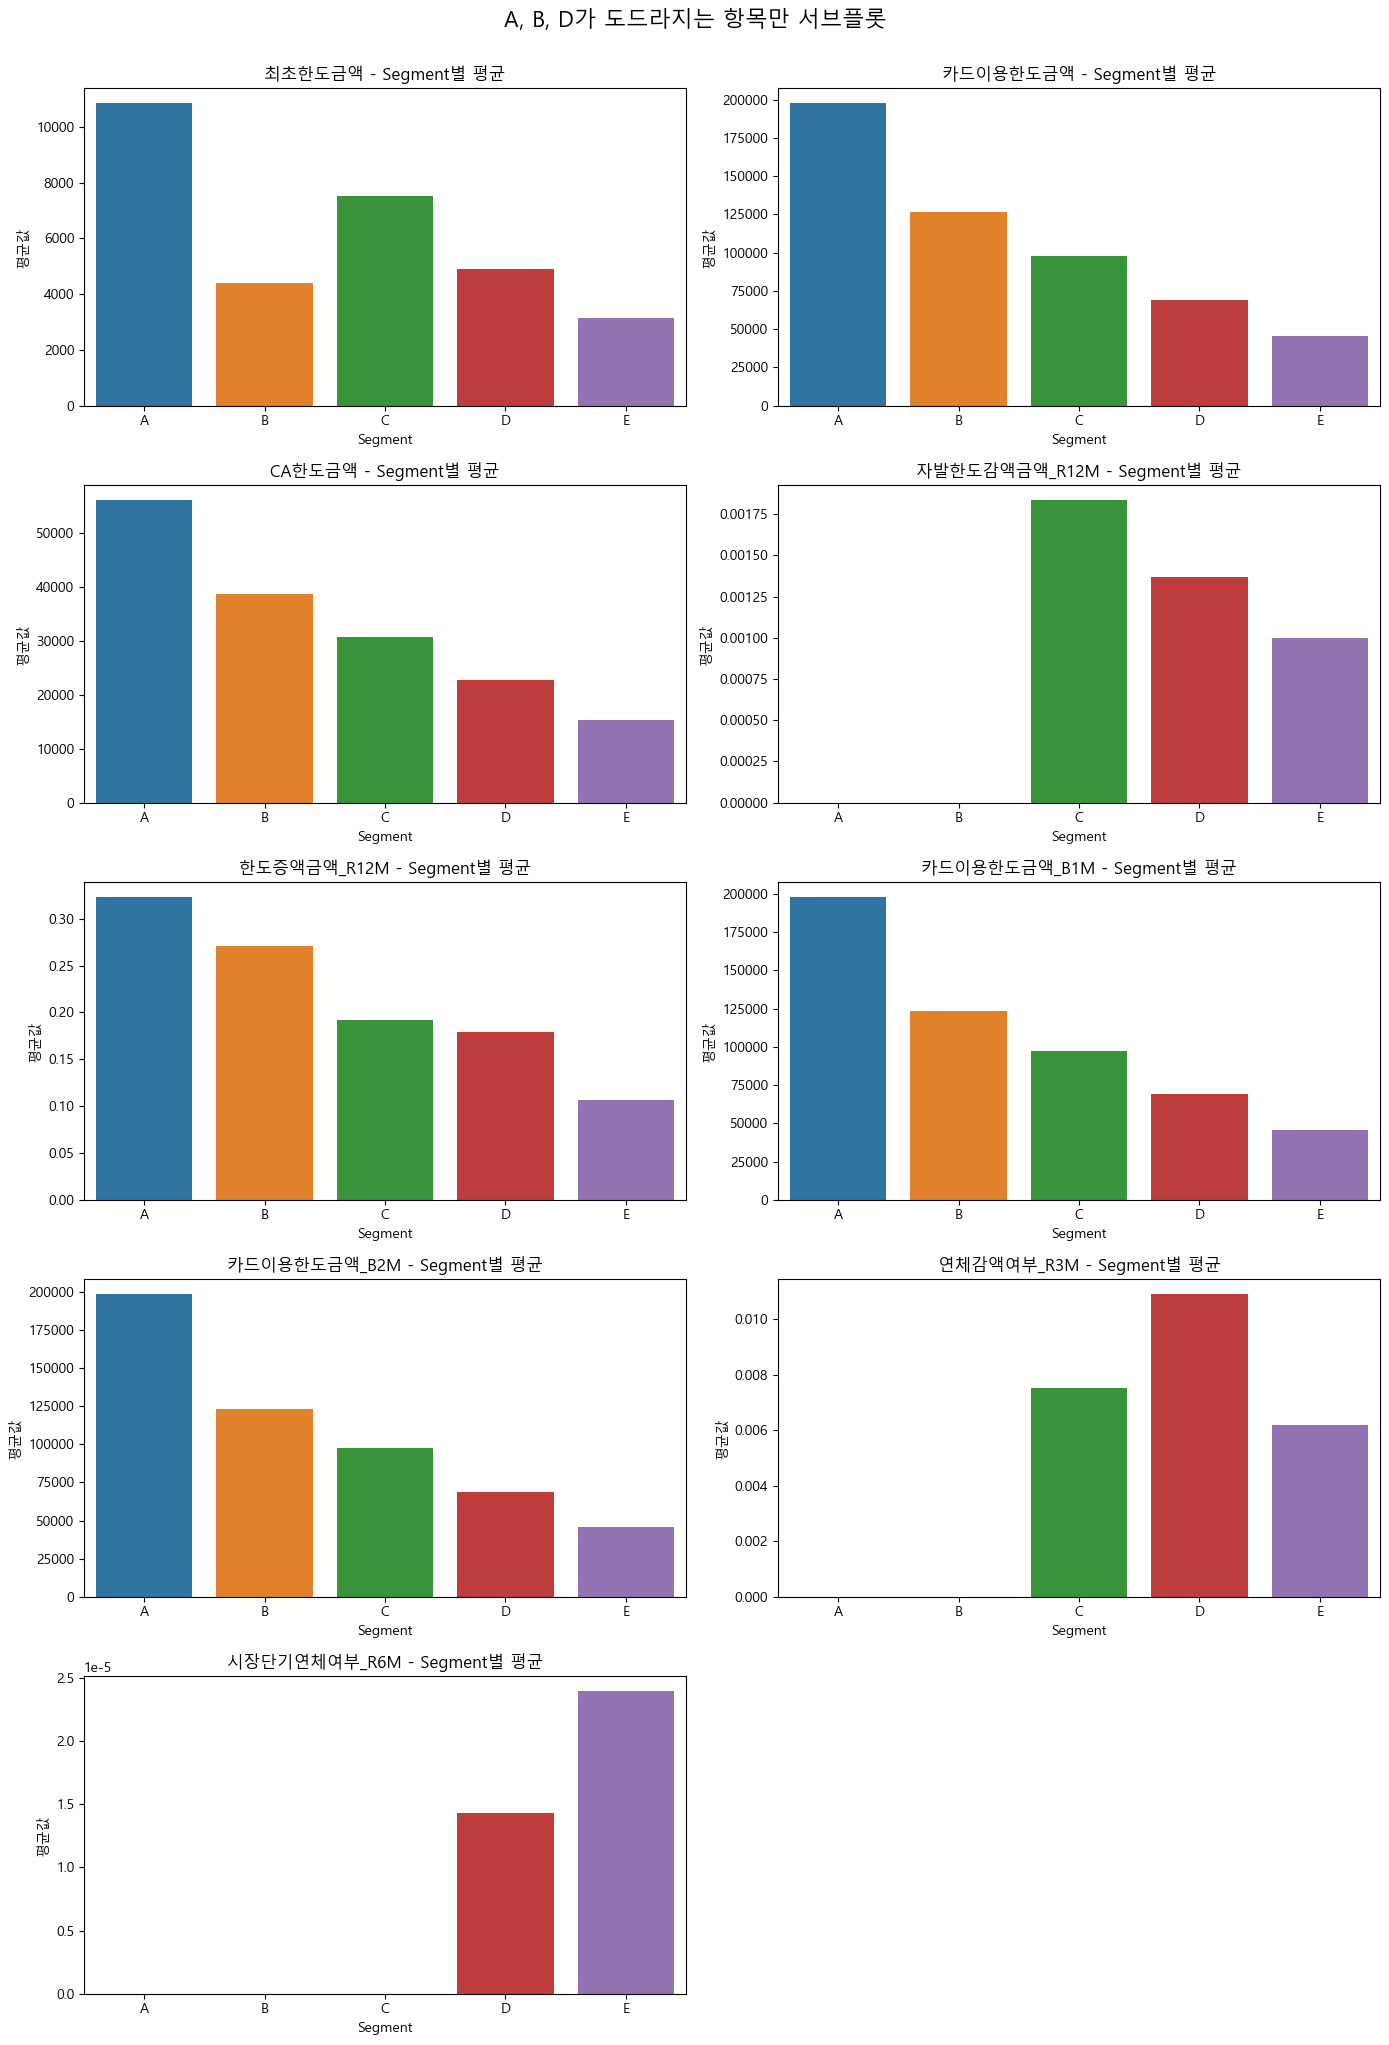

In [46]:
# 4. SegmentÎ≥Ñ Ï†ÑÏ≤¥ ÏàòÏπòÌòï Ïª¨Îüº ÌèâÍ∑† Í≥ÑÏÇ∞
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Segment']

segment_avg = df.groupby('Segment')[numeric_cols].mean(numeric_only=True).reset_index()

# 5. longÌòï Î≥ÄÌôò
plot_df = segment_avg.melt(id_vars='Segment', var_name='Ìï≠Î™©', value_name='ÌèâÍ∑†Í∞í')

# üîç A, B, DÎßå ÌïÑÌÑ∞ÎßÅÌï¥ÏÑú Í∏∞Ï§ÄÎ≥¥Îã§ ÎÜíÏùÄ Ìï≠Î™©Îßå Ï∂îÏ∂ú
ab_d = plot_df[plot_df['Segment'].isin(['A', 'B', 'D'])]

# Ï†ÑÏ≤¥ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
overall_mean = plot_df.groupby('Ìï≠Î™©')['ÌèâÍ∑†Í∞í'].mean().reset_index().rename(columns={'ÌèâÍ∑†Í∞í': 'Ï†ÑÏ≤¥ÌèâÍ∑†'})

# A, B, DÏóêÏÑú ÌïòÎÇòÎùºÎèÑ Ï†ÑÏ≤¥ ÌèâÍ∑†Ïùò 1.5Î∞∞ Ï¥àÍ≥ºÌïòÎäî Ìï≠Î™© Ï∂îÏ∂ú
merged = pd.merge(ab_d, overall_mean, on='Ìï≠Î™©')
merged['ÎπÑÏú®'] = merged['ÌèâÍ∑†Í∞í'] / merged['Ï†ÑÏ≤¥ÌèâÍ∑†']
highlight_cols = merged[merged['ÎπÑÏú®'] > 1.5]['Ìï≠Î™©'].unique()

# ÌïÑÌÑ∞ÎßÅ Ï†ÅÏö©
filtered_df = plot_df[plot_df['Ìï≠Î™©'].isin(highlight_cols)]

# 6. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 7. ÏÑúÎ∏åÌîåÎ°Ø ÏãúÍ∞ÅÌôî
n_cols = 2
n_rows = math.ceil(len(highlight_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(highlight_cols):
    ax = axes[i]
    temp = filtered_df[filtered_df['Ìï≠Î™©'] == col]
    sns.barplot(data=temp, x='Segment', y='ÌèâÍ∑†Í∞í', ax=ax)
    ax.set_title(f"{col} - SegmentÎ≥Ñ ÌèâÍ∑†", fontsize=12)
    ax.set_xlabel("Segment")
    ax.set_ylabel("ÌèâÍ∑†Í∞í")

# ÎÇ®ÏùÄ Îπà Ï∂ï Ï†úÍ±∞
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("A, B, DÍ∞Ä ÎèÑÎìúÎùºÏßÄÎäî Ìï≠Î™©Îßå ÏÑúÎ∏åÌîåÎ°Ø", fontsize=16, y=1.02)
plt.show()


C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1

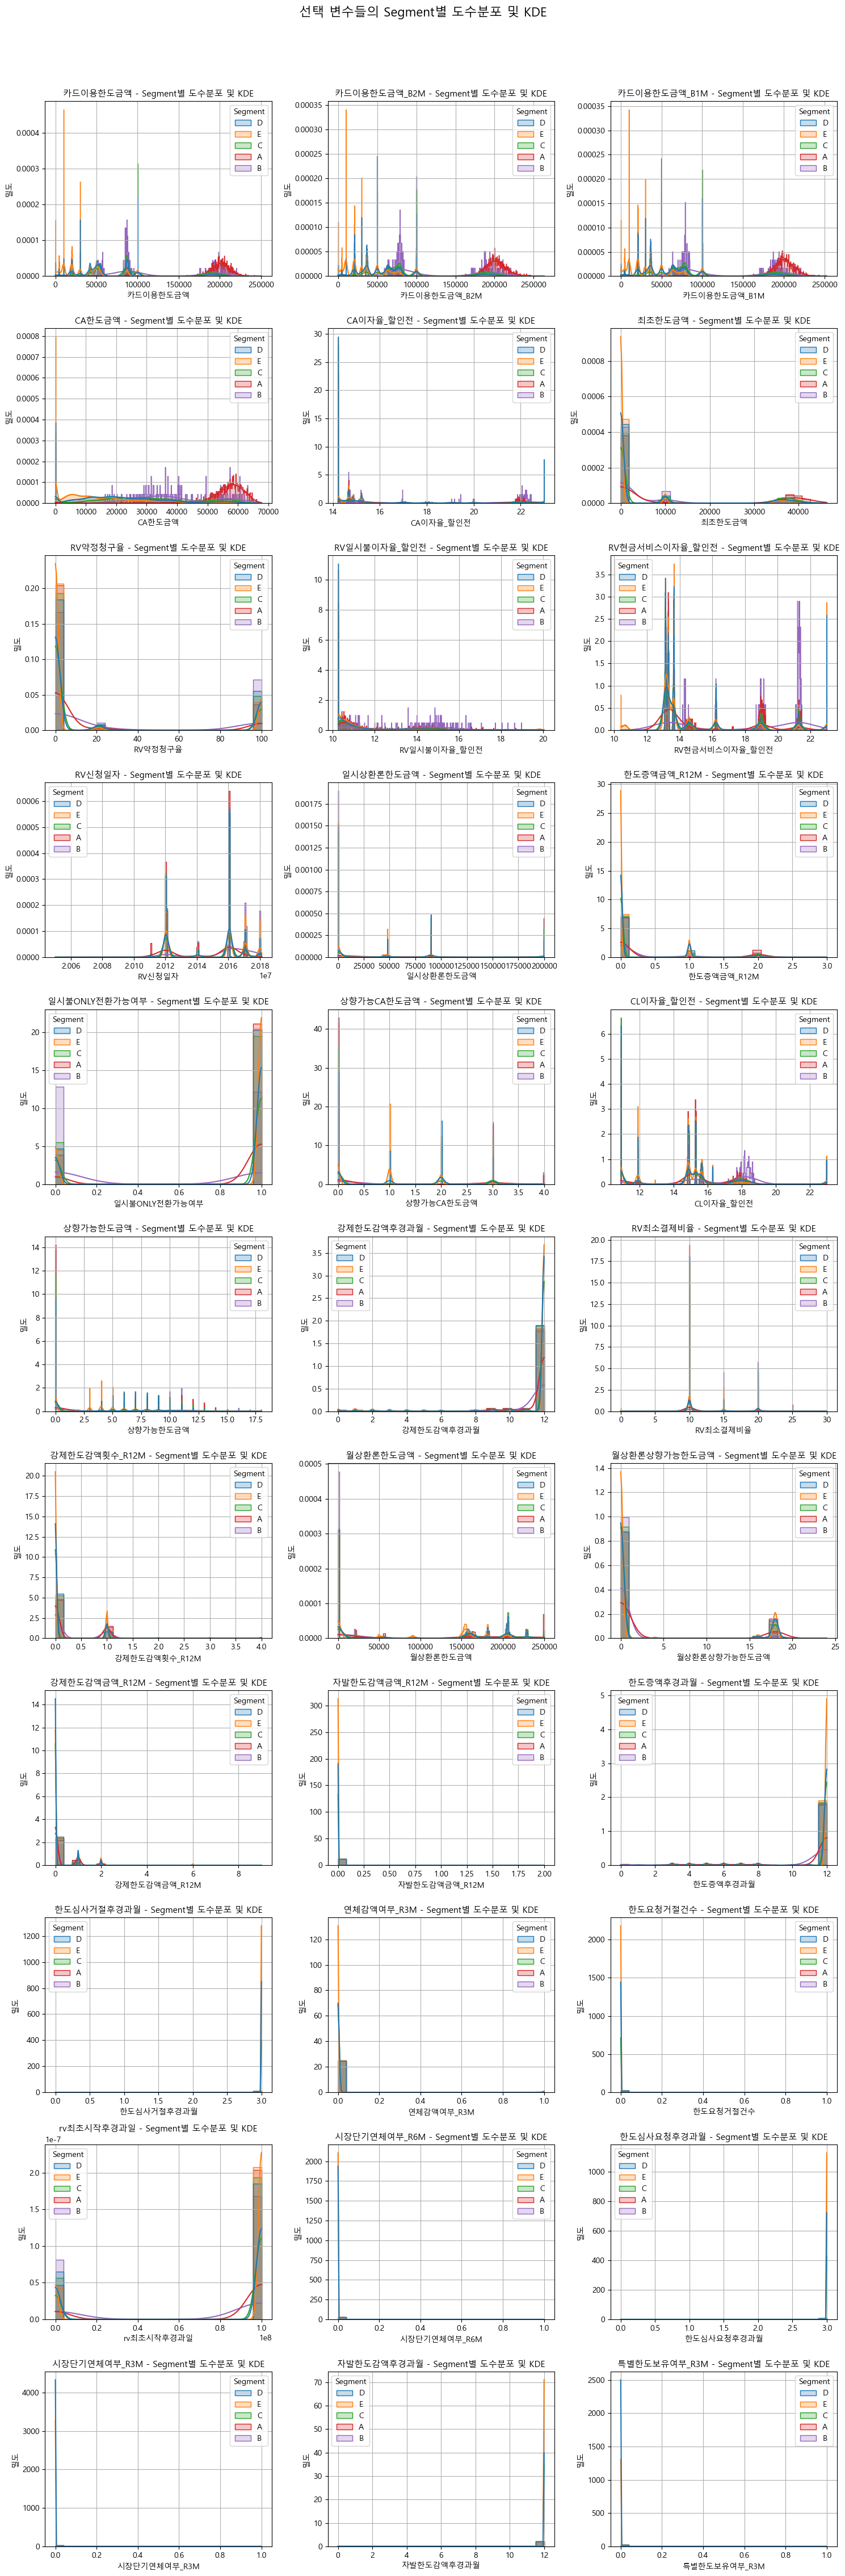

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 0. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏãúÍ∞ÅÌôîÏö©)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. Ïã†Ïö©Ï†ïÎ≥¥ ÌååÏùº Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
credit_file_paths = [
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201807_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201808_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201809_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201810_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201811_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet",
    "C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/open/train/2.Ïã†Ïö©Ï†ïÎ≥¥/201812_train_Ïã†Ïö©Ï†ïÎ≥¥.parquet"
]

# 2. Ïã†Ïö©Ï†ïÎ≥¥ ÌååÏùº Î≥ëÌï© Ìï®Ïàò
def load_and_merge_parquet(file_paths):
    df_list = []
    for path in file_paths:
        df = pd.read_parquet(path)
        Í∏∞Ï§ÄÎÖÑÏõî = os.path.basename(path).split('_')[0]
        df['Í∏∞Ï§ÄÎÖÑÏõî'] = Í∏∞Ï§ÄÎÖÑÏõî
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# 3. Ïã†Ïö©Ï†ïÎ≥¥ Î≥ëÌï©
credit_df = load_and_merge_parquet(credit_file_paths)

# 4. ÌöåÏõêÏ†ïÎ≥¥ÏóêÏÑú ID, SegmentÎßå Î∂àÎü¨Ïò§Í∏∞
member_df = pd.read_csv("C:/Users/HR/Desktop/workspace/ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏/ÌöåÏõêÏ†ïÎ≥¥_201807_201812_ÌÜµÌï©.csv")
member_df = member_df[['ID', 'Segment']]

# 5. Segment Î≥ëÌï©
df = credit_df.merge(member_df, on='ID', how='left')
target_cols = [
    "Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°",
    "Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M",
    "Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M",
    "CAÌïúÎèÑÍ∏àÏï°",
    "CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ",
    "ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°",
    "RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®",
    "RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ",
    "RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ",
    "RVÏã†Ï≤≠ÏùºÏûê",
    "ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°",
    "ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M",
    "ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä",
    "ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°",
    "CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ",
    "ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°",
    "Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî",
    "RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®",
    "Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M",
    "ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°",
    "ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°",
    "Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M",
    "ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M",
    "ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî",
    "ÌïúÎèÑÏã¨ÏÇ¨Í±∞Ï†àÌõÑÍ≤ΩÍ≥ºÏõî",
    "Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M",
    "ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò",
    "rvÏµúÏ¥àÏãúÏûëÌõÑÍ≤ΩÍ≥ºÏùº",
    "ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M",
    "ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠ÌõÑÍ≤ΩÍ≥ºÏõî",
    "ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R3M",
    "ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî",
    "ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M"
]

# 6. ÏúÑ Î¶¨Ïä§Ìä∏ Í∏∞Ï§ÄÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
plot_df = df.copy()
filtered_cols = [col for col in target_cols if col in df.columns]

# 7. subplot ÏÑ§Ï†ï
cols = 3
rows = math.ceil(len(filtered_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

# 8. ÌûàÏä§ÌÜ†Í∑∏Îû® + KDE Í∑∏Î¶¨Í∏∞
for i, col in enumerate(filtered_cols):
    ax = axes[i]
    sns.histplot(data=plot_df, x=col, hue='Segment', element='step',
                 stat='density', common_norm=False, kde=True, ax=ax)
    ax.set_title(f"{col} - SegmentÎ≥Ñ ÎèÑÏàòÎ∂ÑÌè¨ Î∞è KDE", fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel("Î∞ÄÎèÑ")
    ax.grid(True)

# 9. ÎÇ®ÏùÄ subplot Ï†úÍ±∞
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 10. Ï†ÑÏ≤¥ Î†àÏù¥ÏïÑÏõÉ
plt.tight_layout()
plt.suptitle("ÏÑ†ÌÉù Î≥ÄÏàòÎì§Ïùò SegmentÎ≥Ñ ÎèÑÏàòÎ∂ÑÌè¨ Î∞è KDE", fontsize=16, y=1.03)
plt.show()


In [19]:
print(df.columns.tolist())

['Í∏∞Ï§ÄÎÖÑÏõî', 'ID', 'ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°', 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°', 'CAÌïúÎèÑÍ∏àÏï°', 'ÏùºÏãúÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°', 'ÏõîÏÉÅÌôòÎ°†ÌïúÎèÑÍ∏àÏï°', 'CAÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ', 'CLÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ', 'RVÏùºÏãúÎ∂àÏù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ', 'RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ', 'RVÏã†Ï≤≠ÏùºÏûê', 'RVÏïΩÏ†ïÏ≤≠Íµ¨Ïú®', 'RVÏµúÏÜåÍ≤∞Ï†úÎπÑÏú®', 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M', 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M', 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî', 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M', 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M', 'Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî', 'ÌïúÎèÑÏ¶ùÏï°ÌöüÏàò_R12M', 'ÌïúÎèÑÏ¶ùÏï°Í∏àÏï°_R12M', 'ÌïúÎèÑÏ¶ùÏï°ÌõÑÍ≤ΩÍ≥ºÏõî', 'ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°', 'ÏÉÅÌñ•Í∞ÄÎä•CAÌïúÎèÑÍ∏àÏï°', 'Ïπ¥ÎìúÎ°†ÎèôÏùòÏó¨Î∂Ä', 'ÏõîÏÉÅÌôòÎ°†ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°', 'RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä', 'ÏùºÏãúÎ∂àONLYÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä', 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M', 'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M', 'ÌäπÎ≥ÑÌïúÎèÑÎ≥¥Ïú†Ïó¨Î∂Ä_R3M', 'Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M', 'ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Í±¥Ïàò', 'ÌïúÎèÑÏöîÏ≤≠Í±∞Ï†àÍ±¥Ïàò', 'ÌïúÎèÑÏã¨ÏÇ¨ÏöîÏ≤≠Ìõ

C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


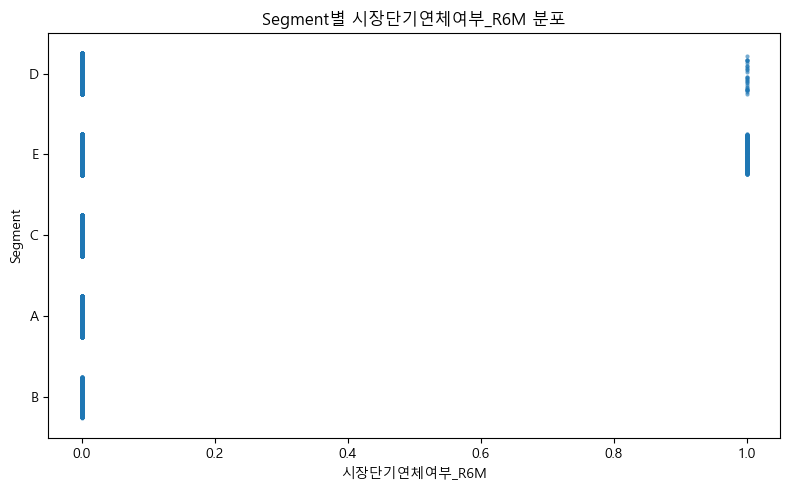

ValueError: Could not interpret value ` ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°` for parameter `x`

<Figure size 800x500 with 0 Axes>

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Î≥ÄÏàò Î¶¨Ïä§Ìä∏
cols_to_plot = ['ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M',' ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°','ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M', 'Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M',]

# 4Í∞ú Î≥ÄÏàò Í∞ÅÍ∞ÅÏóê ÎåÄÌï¥ ÌîåÎ°Ø
for col in cols_to_plot:
    plt.figure(figsize=(8, 5))
    sns.stripplot(data=df, x=col, y='Segment', jitter=0.25, alpha=0.6, size=3)
    plt.title(f'SegmentÎ≥Ñ {col} Î∂ÑÌè¨')
    plt.xlabel(col)
    plt.ylabel('Segment')
    plt.tight_layout()
    plt.show()

In [22]:
import pandas as pd
import numpy as np

cols_to_plot = ['ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M', 'ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°', 'ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M', 'Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M']
segment_targets = ['C', 'D', 'E']

cv_results = {}

for col in cols_to_plot:
    cv_results[col] = {}
    for seg in segment_targets:
        seg_data = df[df['Segment'] == seg][col].dropna()
        mean = seg_data.mean()
        std = seg_data.std()
        cv = std / mean if mean != 0 else float('inf')
        cv_results[col][f'CV_{seg}'] = round(cv, 3)

# Í≤∞Í≥º Î≥¥Í∏∞
cv_df = pd.DataFrame(cv_results).T
cv_df['CV_Diff_D_vs_CE'] = cv_df['CV_D'] - ((cv_df['CV_C'] + cv_df['CV_E']) / 2)
cv_df = cv_df[['CV_C', 'CV_D', 'CV_E', 'CV_Diff_D_vs_CE']]

display(cv_df)



CV_C     CV_D     CV_E  CV_Diff_D_vs_CE
ÏãúÏû•Îã®Í∏∞Ïó∞Ï≤¥Ïó¨Î∂Ä_R6M      inf  264.287  204.408             -inf
ÏµúÏ¥àÌïúÎèÑÍ∏àÏï°          1.898    2.415    3.072          -0.0700
ÏûêÎ∞úÌïúÎèÑÍ∞êÏï°Í∏àÏï°_R12M  24.499   28.035   32.996          -0.7125
Ïó∞Ï≤¥Í∞êÏï°Ïó¨Î∂Ä_R3M     11.497    9.528   12.669          -2.5550